In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q5.1

(a) 设持有A资产的比例为$w$，持有B资产的比例为$1-w$，则资产组合的期望和方差分别为

$$
E(r) = w r_A + (1-w) r_B
$$

$$
\sigma^2 (r) = w^2 \sigma_A^2 + (1-w)^2 \sigma_B^2 + 2 w (1-w) \sigma_{AB}
$$

我们可以画出不同相关系数下资产组合的均值-标准差曲线。

In [2]:
def curve(rho, N=101):
    """Compute a mean-std curve of asset A and B with a given correlation coefficient.

    Args:
        rho: a given correlation coefficient
        N: number of samples on weight
    
    Returns:
        r: the expected (mean) return of the portfolio
        std: the std of the portfolio
    """

    ## some constants
    rA = 0.10
    rB = 0.15
    stdA = 0.15
    stdB = 0.20

    cov = rho * stdA * stdB
    sigA = stdA * stdA
    sigB = stdB * stdB

    ## sample on w
    w = np.linspace(0., 1.0, N)
    
    ## return and its std
    r = w * rA + (1-w) * rB
    sig = w * w * sigA + (1-w)*(1-w) * sigB + 2*w*(1-w) * cov
    std = np.sqrt(sig)

    return r, std
    

(0.0, 0.2)

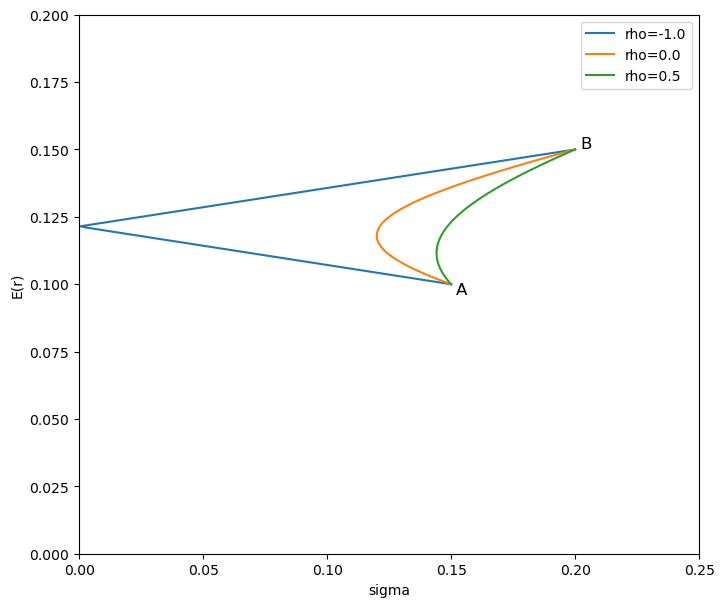

In [3]:
plt.figure(figsize=(8,7))

N = 101

for rho in [-1, 0, 0.5]:
    r, std = curve(rho, N)
    plt.plot(std, r, label=f"rho={rho:.1f}")

dloc = 0.002
plt.text(0.15+dloc, 0.1-dloc, "A", verticalalignment="center", fontdict={"size": 12})
plt.text(0.20+dloc, 0.15+dloc, "B", verticalalignment="center", fontdict={"size": 12})

plt.legend()
plt.xlabel("sigma")
plt.ylabel("E(r)")
plt.xlim(0, 0.25)
plt.ylim(0, 0.20)

接下来从理论层面进行推导。资产组合的方差$\sigma^2$对权重$w$进行求导并令导数为0有

$$
\frac{\mathrm{d} \sigma^2}{\mathrm{d} w} = 2 w \sigma_A^2 + 2 (w - 1) \sigma_B^2 + (2 - 4 w) \sigma_{AB} = 0
$$

解得方差最小时对应的组合权重为

$$
w^* = \frac{\sigma_B^2 - \sigma_{AB}}{\sigma_A^2 + \sigma_B^2 - 2 \sigma_{AB}} 
= \frac{\sigma_B^2 - \rho \sigma_A \sigma_B}{\sigma_A^2 + \sigma_B^2 - 2 \rho \sigma_A \sigma_B}
$$

带入$\rho = -1, 0, 0.5$ 可以得到不同相关系数下拥有最小风险(标准差)时的资产组合系数以及对应的标准差为

In [4]:
rA = 0.10
rB = 0.15
stdA = 0.15
stdB = 0.20

sigA = stdA * stdA
sigB = stdB * stdB

for rho in [-1, 0, 0.5]:
    cov = rho * stdA * stdB
    w = (sigB - cov) / (sigA + sigB - 2 * cov)

    sig = w * w * sigA + (1-w)*(1-w) * sigB + 2*w*(1-w) * cov
    std = np.sqrt(sig)

    print(f"Optimal w at rho = {rho:.1f} is w* = {w:.3f}, std = {std:.3f}")

Optimal w at rho = -1.0 is w* = 0.571, std = 0.000
Optimal w at rho = 0.0 is w* = 0.640, std = 0.120
Optimal w at rho = 0.5 is w* = 0.769, std = 0.144


不难发现，随着A和B两种资产之间的相关系数逐渐增大，组合中资产A的比重也会逐渐增大。这是由于随着两种资产间相关系数的增大，资产组合抵消它们之间风险的能力会不断减弱，此时最小风险组合会倾向于选择更多风险小的资产。

(b) 假设存在利率为0.05的无风险资产，则其与A、B资产构成的最优组合即为资本市场线。要推导资本市场线公式，我们可以构造一个优化问题：

$$
\begin{aligned}
\max \frac{r_w - r_f}{\sigma_w} 
&= \frac{w r_A + (1-w) r_B - r_f}{\sqrt{w^2 \sigma_A^2 + (1-w)^2 \sigma_B^2 + 2 w (1-w) \sigma_{AB}}} \\
&= \frac{w (r_A - r_B) + r_B - r_f}{\sqrt{w^2 \sigma_A^2 + (1-w)^2 \sigma_B^2 + 2 w (1-w) \sigma_{AB}}}
\end{aligned}
$$

对上式求导并令导数为0得到

$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} w} \bigg( \frac{r_w - r_f}{\sigma_w} \bigg) 
&= \frac{1}{\sigma_w^2} \bigg( \frac{\mathrm{d} r_w}{\mathrm{d} w} \sigma_w - \frac{\mathrm{d} \sigma_w}{\mathrm{d} w} (r_w - r_f) \bigg) = 0
\end{aligned}
$$

因此有

$$
(r_A - r_B) \sigma_w = (r_w - r_f) \frac{\mathrm{d} \sigma_w}{\mathrm{d} w}
$$

将$\frac{\mathrm{d} \sigma_w}{\mathrm{d} w}$展开有

$$
\begin{aligned}
\frac{\mathrm{d} \sigma_w}{\mathrm{d} w} &= \frac{1}{2 \sigma_w} (2 w \sigma_A^2 + 2 (w - 1) \sigma_B^2 + (2 - 4 w) \sigma_{AB}) \\
&= \frac{w \sigma_A^2 + (w - 1) \sigma_B^2 + (1 - 2 w) \sigma_{AB}}{\sigma_w}
\end{aligned}
$$

代回方程得到

$$
(r_A - r_B) \sigma_w^2 = [w r_A + (1-w) r_B - r_f] \cdot [w \sigma_A^2 + (w - 1) \sigma_B^2 + (1 - 2 w) \sigma_{AB}]
$$

整理之后可以得到一个关于$w$的一元一次方程，最终得到

$$
w = \frac{(r_A - r_f) \sigma_B^2 - (r_B - r_f) \sigma_{AB}}{(r_B - r_f) \sigma_A^2 + (r_A - r_f) \sigma_B^2 - [(r_A - r_f) + (r_B - r_f)] \sigma_{AB}}
$$

带入$\rho = -1, 0, 0.5$ 可以得到不同相关系数下两种资产的最优配置比例。

In [5]:
rA = 0.10
rB = 0.15
rf = 0.05

rAf = rA - rf
rBf = rB - rf

stdA = 0.15
stdB = 0.20

sigA = stdA * stdA
sigB = stdB * stdB

for rho in [-1, 0, 0.5]:
    cov = rho * stdA * stdB
    w = (rAf * sigB - rBf * cov) / (rBf * sigA + rAf * sigB - (rAf + rBf) * cov)

    print(f"Optimal portfolio at rho = {rho:.1f} is: {w:.2%} A + {1-w:.2%} B")

Optimal portfolio at rho = -1.0 is: 57.14% A + 42.86% B
Optimal portfolio at rho = 0.0 is: 47.06% A + 52.94% B
Optimal portfolio at rho = 0.5 is: 25.00% A + 75.00% B
